In [6]:
import tensorflow as tf


In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)

2.4.0
Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2426 - accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0375 - accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0237 - accuracy: 0.9919
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0156 - accuracy: 0.9946
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0092 - accuracy: 0.9970
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0071 - accuracy: 0.9979
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0076 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0050 - accuracy: 0.9984
Epoch 10/10
313/313 [==============================] - 1s 3ms/step 

In [165]:
from skimage import io
img = io.imread('9.png', as_gray=True)

In [166]:
from skimage.transform import rescale, resize, downscale_local_mean,rotate
from skimage.exposure import adjust_gamma

In [167]:
image_resized = resize(img, (28,28),
                       anti_aliasing=False)

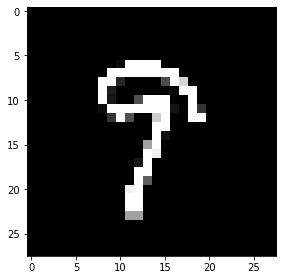

In [168]:
io.imshow(image_resized)

In [169]:
image_resized = image_resized>0.5
image_resized = image_resized.astype(int)*0.999999

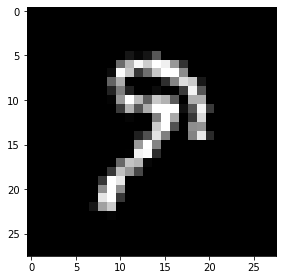

In [170]:
io.imshow(rotate(image_resized,-20))

In [171]:
model.predict(image_resized.reshape(-1,28,28,1))

array([[7.1435785e-08, 2.0526549e-08, 3.7057715e-04, 9.4144561e-06,
        2.1017982e-07, 6.0808503e-07, 3.8080573e-11, 2.3667829e-01,
        3.5841558e-02, 7.2709924e-01]], dtype=float32)

In [172]:
model.predict((rotate(image_resized,-20)).reshape(-1,28,28,1))

array([[3.7838649e-07, 9.2348074e-07, 2.9203051e-01, 2.2896947e-06,
        2.4033286e-06, 3.5415898e-08, 1.5765636e-12, 1.4171238e-03,
        2.3817301e-01, 4.6837330e-01]], dtype=float32)

In [108]:
x_train[0].shape

NameError: name 'x_train' is not defined

In [93]:
image_resized.shape

(28, 28)

In [39]:
image_resized[14]

array([0.00000000e+00, 1.88053824e-05, 1.79122243e-02, 4.36413687e-01,
       7.90792208e-01, 1.49413823e-01, 1.09604507e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.04951554e-09, 1.68753150e-03,
       2.07538629e-01, 8.62668873e-01, 5.43826412e-01, 7.93932895e-01,
       3.87133048e-01, 4.05000254e-02, 1.89973496e-03, 1.28521342e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [47]:
image_resized

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.17699457e-11, 7.78971262e-07, 1.19655255e-04, 2.05845753e-03,
        3.05086377e-03, 3.12645739e-04, 3.73763105e-06, 2.17226717e-09,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

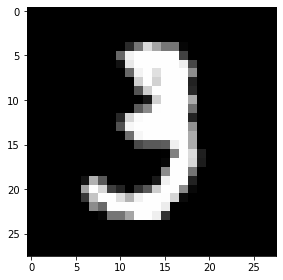

In [145]:
io.imshow(x_train[10])

In [153]:
y_train

NameError: name 'y_train' is not defined

In [155]:
training_labels  == 9

array([False, False, False, ..., False, False, False])

In [157]:
import numpy as np

In [159]:
np.argwhere(training_labels==9)

array([[    4],
       [   19],
       [   22],
       ...,
       [59973],
       [59990],
       [59992]])

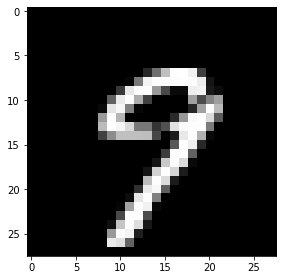

In [164]:
io.imshow(training_images[59973])

In [173]:
model.save('./cnn')

INFO:tensorflow:Assets written to: ./cnn/assets
